# <p align="center"> IT609 Big Data Processing </p>
# <p align="center"> Assignment 1</p>
# <p align="center"> Anurag Shukla (202318039)</p>

---
---

## Task A: Develop Python code to perform block multiplication on two given matrices.

---
---

In [5]:
import numpy as np

In [6]:
def mat_mul(m1, m2):
    answer_matrix = np.zeros(shape=(m1.shape[0], m2.shape[1]))
    for row_m1 in range(m1.shape[0]):
        for col_m2 in range(m2.shape[1]):
            val = 0
            for col_m1 in range(m1.shape[1]):
                val += m1[row_m1][col_m1] * m2[col_m1][col_m2]
            answer_matrix[row_m1][col_m2] = round(val,4)
    return answer_matrix

In [7]:
def block_mat_mul(m1, m2):
    m1_r, m1_c = m1.shape
    m2_c = m2.shape[1]
    if m1_r <=3 and m1_c <= 3 and m2_c <= 3:
        return mat_mul(m1, m2)
    else:
        m1_r_h = m1_r//2
        m1_c_h = m1_c//2
        m2_c_h = m2_c//2
        a1, a2 = m1[:m1_r_h], m1[m1_r_h:]
        b1, b2 = m2[:m1_c_h], m2[m1_c_h:]
        a11, a12 = a1[:, :m1_c_h], a1[:,m1_c_h:]
        a21, a22 = a2[:, :m1_c_h], a2[:,m1_c_h:]
        b11, b12 = b1[:, :m2_c_h], b1[:,m2_c_h:]
        b21, b22 = b2[:, :m2_c_h], b2[:,m2_c_h:]

        c11 = block_mat_mul(a11, b11) + block_mat_mul(a12, b21)
        c12 = block_mat_mul(a11, b12) + block_mat_mul(a12, b22)
        c21 = block_mat_mul(a21, b11) + block_mat_mul(a22, b21)
        c22 = block_mat_mul(a21, b12) + block_mat_mul(a22, b22)

        c1 = np.hstack((c11, c12))
        c2 = np.hstack((c21, c22))
        return np.vstack((c1, c2))
        

In [8]:
m1 = np.random.randint(100, size=(10,15))
m2 = np.random.randint(100, size=(15,10))

In [9]:
m1

array([[44, 49, 32, 63, 43, 57, 77, 95, 42,  1, 75, 21, 99, 49, 21],
       [82, 36, 85, 29, 41, 48, 63, 13, 29, 50, 38, 48,  6, 96,  8],
       [39, 93, 13, 90, 53, 72, 61, 51, 87, 97, 84,  1, 86, 51, 57],
       [35, 99, 58, 74,  9, 50, 57, 26, 92, 83, 56, 39, 43, 44, 58],
       [96, 48, 92, 13,  9, 63, 35, 53, 38, 24, 58, 18, 13, 70, 94],
       [64, 17, 22, 58, 86, 66, 70, 41,  6,  8, 27, 16, 55, 21, 92],
       [82, 82, 84, 80,  2, 14, 74, 64, 13, 13, 30, 86, 29, 98, 46],
       [88, 47, 48, 15, 95, 76, 90, 43, 72, 87, 58, 61, 88, 44,  2],
       [ 6, 11, 61, 43, 53, 37, 36, 15, 51, 37, 25, 24, 57, 54, 45],
       [31, 48, 59, 79, 70, 44, 50, 57, 90, 73, 68, 49, 91, 84, 21]])

In [10]:
m2

array([[30, 76, 70, 52, 59, 72, 98, 16, 31, 75],
       [35, 90, 94, 44, 92, 76, 45, 33, 91, 45],
       [ 1, 59, 72, 58, 95, 16, 45,  8, 97, 27],
       [66, 28, 57, 94, 30, 99,  3, 64, 65,  8],
       [13, 18, 87,  0, 17,  0, 39, 79, 70, 60],
       [91, 91, 53, 47, 22, 40, 55, 99, 13, 32],
       [35, 10, 74, 54, 39, 74, 65, 13, 13, 11],
       [57, 22, 20, 89, 56, 98, 69, 27, 94, 41],
       [63, 49, 33, 29, 47,  4, 47, 55, 83, 73],
       [25, 63, 18, 61, 41, 67, 93, 58, 16, 36],
       [82, 23, 87,  3, 16, 23,  1, 64, 75, 48],
       [27,  5, 32, 84, 19, 65, 16, 54,  3, 34],
       [33,  9, 43, 80, 18, 38, 45, 88, 29,  3],
       [81, 70, 37, 65, 33, 70, 45, 78,  2, 75],
       [41, 49,  8,  3, 95, 53, 15, 98, 93, 99]])

In [11]:
np.array_equal(mat_mul(m1,m2), m1.dot(m2))

True

In [12]:
np.array_equal(mat_mul(m1,m2), block_mat_mul(m1, m2))

True

In [13]:
np.array_equal(block_mat_mul(m1,m2), m1.dot(m2))

True

---
---

## Task B 

#### This segment of the assignment is designed to enhance your understanding of the API call process and dataset creation. Utilize any freely available API endpoint on Rapidapi to generate a dataset.

---
---

In [14]:
import requests

url = "https://omgvamp-hearthstone-v1.p.rapidapi.com/cards"

headers = {
	"X-RapidAPI-Key": "dummy_key",
	"X-RapidAPI-Host": "omgvamp-hearthstone-v1.p.rapidapi.com"
}

response = requests.get(url, headers=headers)
js = response.json()


In [15]:
from json import loads

with open("hearth_stone.json", "r") as f:
    lines = " ".join(f.readlines())
    js = loads(lines)

In [16]:
all_cards = [card for key in js.keys() for card in js[key]]

In [17]:
import pandas as pd
df = pd.DataFrame(all_cards)

In [18]:
df[:10]

,cardId,dbfId,name,cardSet,type,text,playerClass,locale,faction,mechanics,...,imgGold,otherRaces,howToGetSignature,armor,howToGet,howToGetGold,howToGetDiamond,multiClassGroup,classes,runeCost
0,RLK_Prologue_CS2_092e,100672,Blessing of Kings,Basic,Enchantment,+4/+4.,Paladin,enUS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,RLK_Prologue_CS2_087e,100661,Blessing of Might,Basic,Enchantment,+3 Attack.,Paladin,enUS,Neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,RLK_Prologue_BT_035e,100824,Chaos Strike,Basic,Enchantment,+2 Attack this turn.,Demon Hunter,enUS,NaN,[{'name': 'OneTurnEffect'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,RLK_Prologue_BT_512e,100845,Demon Power,Basic,Enchantment,+8 Attack,Demon Hunter,enUS,NaN,[{'name': 'OneTurnEffect'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BG_CS2_200_G,101726,Boulderfist Ogre,Basic,Minion,<i>Six Attack and seven Health are <b>already<...,Neutral,enUS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BG_CS2_200,101727,Boulderfist Ogre,Basic,Minion,NaN,Neutral,enUS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,RLK_Prologue_DS1_185,100777,Arcane Shot,Basic,Spell,Deal $2 damage.,Hunter,enUS,Neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,RLK_Prologue_CS2_087,100653,Blessing of Might,Basic,Spell,Give a minion +3_Attack.,Paladin,enUS,Neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,RLK_Prologue_CS2_087_AI,101024,Blessing of Might,Basic,Spell,Give a minion +3_Attack.,Paladin,enUS,Neutral,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,HERO_11bpt,78164,Frail Ghoul,Basic,Minion,"[x]<b>Charge</b>\nAt the end of your turn,\nth...",Death Knight,enUS,NaN,[{'name': 'Charge'}],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.size

914688

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28584 entries, 0 to 28583
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cardId             28584 non-null  object 
 1   dbfId              28584 non-null  int64  
 2   name               28584 non-null  object 
 3   cardSet            28584 non-null  object 
 4   type               23951 non-null  object 
 5   text               24325 non-null  object 
 6   playerClass        23567 non-null  object 
 7   locale             28584 non-null  object 
 8   faction            5210 non-null   object 
 9   mechanics          9396 non-null   object 
 10  cost               18941 non-null  float64
 11  attack             9493 non-null   float64
 12  health             11342 non-null  float64
 13  flavor             6158 non-null   object 
 14  artist             9302 non-null   object 
 15  elite              2607 non-null   object 
 16  rarity             900

In [21]:

# percentage of non-null values

round(df.count()/len(df)*100,2).sort_values(ascending=False)

cardId               100.00
name                 100.00
cardSet              100.00
locale               100.00
dbfId                100.00
text                  85.10
type                  83.79
playerClass           82.45
cost                  66.26
health                39.68
attack                33.21
mechanics             32.87
artist                32.54
rarity                31.50
img                   30.41
flavor                21.54
collectible           20.45
faction               18.23
race                  15.63
spellSchool           10.58
elite                  9.12
imgGold                6.69
howToGetGold           2.38
howToGet               2.13
durability             1.62
otherRaces             1.04
armor                  0.61
runeCost               0.53
multiClassGroup        0.47
classes                0.47
howToGetSignature      0.30
howToGetDiamond        0.16
dtype: float64

---
---

## Task C 

#### In this part of the assignment, you will learn how to construct a dataset by scraping a website online. Utilize BeautifulSoup or any other suitable scraping library to extract all the details of Amazon products and compile a dataset.

---
---

### Scrapping Amazon for "Gaming Laptops"

In [22]:
import requests

reqUrl = "https://www.amazon.in/s?k=Gaming%2BLaptops&page={page_num}"

headersList = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:122.0) Gecko/20100101 Firefox/122.0",
    "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
    "Accept-Language": "en-US,en;q=0.5",
    "Accept-Encoding": "gzip, deflate, br",
    "DNT": "1",
    "Sec-GPC": "1",
    "Connection": "keep-alive",
    "Cookie": "dummy_cookie",
    "Upgrade-Insecure-Requests": "1",
    "Sec-Fetch-Dest": "document",
    "Sec-Fetch-Mode": "navigate",
    "Sec-Fetch-Site": "none",
    "Sec-Fetch-User": "?1",
    "TE": "trailers" 
}

payload = ""

In [23]:
responses = []
for i in range(1,51):
    r = requests.request("GET", reqUrl.format(page_num = i), data=payload,  headers=headersList)
    if r.status_code == 200:
        print(f"Scrapped Page {i}")
        responses.append(r)

Scrapped Page 1
Scrapped Page 2
Scrapped Page 3
Scrapped Page 4
Scrapped Page 5
Scrapped Page 6
Scrapped Page 7
Scrapped Page 8
Scrapped Page 9
Scrapped Page 10
Scrapped Page 11
Scrapped Page 12
Scrapped Page 13
Scrapped Page 14
Scrapped Page 15
Scrapped Page 16
Scrapped Page 17
Scrapped Page 18
Scrapped Page 19
Scrapped Page 20
Scrapped Page 21
Scrapped Page 22
Scrapped Page 23
Scrapped Page 24
Scrapped Page 25
Scrapped Page 26
Scrapped Page 27
Scrapped Page 28
Scrapped Page 29
Scrapped Page 30
Scrapped Page 31
Scrapped Page 32
Scrapped Page 33
Scrapped Page 34
Scrapped Page 35
Scrapped Page 36
Scrapped Page 37
Scrapped Page 38
Scrapped Page 39
Scrapped Page 40
Scrapped Page 41
Scrapped Page 42
Scrapped Page 43
Scrapped Page 44
Scrapped Page 45
Scrapped Page 46
Scrapped Page 47
Scrapped Page 48
Scrapped Page 49
Scrapped Page 50


#### Stripping HTML of unneccesary tags

In [24]:
import re
def clean_responses(input_string):
    # removing unneccesary tags
    cleaned_string = re.sub(r'<script(\n|.)*?</script>', '', input_string)
    cleaned_string = re.sub(r'<style(\n|.)*?</style>', '', cleaned_string)
    cleaned_string = re.sub(r'<!--(\n|.)*?-->', '', cleaned_string)
    
    # removing multiple consecutive spaces
    cleaned_string = re.sub(r'\s+', ' ', cleaned_string)
    
    cleaned_string = cleaned_string.strip()
    return cleaned_string

#### Saving HTMLs locally

In [25]:
from os import mkdir
mkdir("./html")
html_files = []
for index, resp in enumerate(responses,start=1):
    html_file_path = f"./html/response_{index}.html"
    html_files.append(html_file_path)
    with open(html_file_path, "w", encoding="utf-8") as f:
            f.write(clean_responses(resp.text))

#### Extracting ASIN code of laptops from HTMLs

In [26]:
from bs4 import BeautifulSoup
urls = []
for resp in responses:
    soup = BeautifulSoup(resp.text, 'html.parser')
    divs = soup.find_all('div')
    for div in divs:
        code = div.get('data-asin') 
        if code is not None and code != "":
            urls.append(f"https://www.amazon.in/gp/aw/d/{code}/")

In [27]:
with open("urls.txt", "w") as f:
    f.writelines("\n".join(set(urls)))

#### Function to extract product details from the table of product HTML

In [28]:
def get_info(response_text):
    soup = BeautifulSoup(response_text, 'html.parser')
    table = soup.find('table',{'id': 'productDetails_techSpec_section_1'})
    if table:
        rows = table.find_all('tr')
        data = {}
        for row in rows:
            header = row.find('th')
            value = row.find('td')
            if header and value:
                header_text = header.text.strip()
                value_text = value.text.strip()
                data[header_text] = value_text
        print("data collected")
        return data
    else:
        print('No table found with the specified ID.')
        

#### Calling each url to fetch the product page HTML code

In [29]:
data = []
for index, url in enumerate(list(set(urls)),start=1):
    resp = requests.get(url, headers= headersList)
    print("-"*30)
    print(f"[{index}]", resp.status_code, url)
    if resp.status_code == 200:
        info = get_info(resp.text)
        if info is not None:
            data.append(info)

------------------------------
[1] 200 https://www.amazon.in/gp/aw/d/B0BW9NMXP5/
data collected
------------------------------
[2] 200 https://www.amazon.in/gp/aw/d/B0B9BSYKWS/
data collected
------------------------------
[3] 200 https://www.amazon.in/gp/aw/d/B0CDBP1N8B/
data collected
------------------------------
[4] 200 https://www.amazon.in/gp/aw/d/B0BLYWZBQ5/
data collected
------------------------------
[5] 200 https://www.amazon.in/gp/aw/d/B0CL5MJL13/
data collected
------------------------------
[6] 200 https://www.amazon.in/gp/aw/d/B0B7S15XTV/
data collected
------------------------------
[7] 200 https://www.amazon.in/gp/aw/d/B0C1Z4GS7L/
data collected
------------------------------
[8] 200 https://www.amazon.in/gp/aw/d/B0B3DMMS9L/
data collected
------------------------------
[9] 200 https://www.amazon.in/gp/aw/d/B0CDG91FHT/
data collected
------------------------------
[10] 200 https://www.amazon.in/gp/aw/d/B0BS9GGMW5/
data collected
------------------------------
[11] 200

In [30]:
len(data)

371

#### Saving product details in `output.json`

In [31]:
import json
with open('output.json', 'w', encoding='utf-8') as json_file:
    json.dump(data, json_file, ensure_ascii=False, indent=4)

In [32]:
import json
data = []
with open('output.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

#### Creating a dataframe of the product details

In [33]:
import pandas as pd
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
df = pd.DataFrame(data)

In [34]:
df

,Brand,Manufacturer,Series,Colour,Form Factor,Item Height,Item Width,Standing screen display size,Screen Resolution,Product Dimensions,Batteries,Item model number,Processor Brand,Processor Type,Processor Speed,Processor Count,RAM Size,Memory Technology,Computer Memory Type,Maximum Memory Supported,Hard Drive Size,Hard Disk Description,Hard Drive Interface,Audio Details,Graphics Coprocessor,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Graphics Card Ram Size,Graphics Card Interface,Connectivity Type,Number of USB 2.0 Ports,Number of USB 3.0 Ports,Number of HDMI Ports,Voltage,Wattage,Power Source,Hardware Platform,Operating System,Are Batteries Included,Lithium Battery Energy Content,Number of Lithium Ion Cells,Included Components,Country of Origin,Item Weight,Resolution,Wireless Type,Rear Webcam Resolution,Average Battery Standby Life (in hours),Average Battery Life (in hours),Package Dimensions,Optical Drive Type,Speaker Description,Front Webcam Resolution,Memory Clock Speed,Model,Model Name,Model Year,Memory Storage Capacity,Flash Memory Installed Size,Ram Memory Installed Size,RAM memory maximum size,Ram Memory Technology,Processor model number,Hardware Interface,Special Features,Chipset Type,Mounting Hardware,Number of items,Software included,Display Technology,Display Type,Aspect Ratio,Audio Output Type,Microphone format,Batteries Included,Batteries Required,Battery cell composition,Refresh Rate,Number of Ports,Total USB ports,Keyboard Description,Connector Type,Device interface - primary,Device type,Battery Average Life,Number of Lithium Metal Cells,Lithium Battery Weight,Memory Slots Available,Digital storage capacity,Cellular technology,Hard Disk Rotational Speed,Battery Average Life Standby,Response Time,Wireless Carrier,Battery Description,Image contrast ratio,Microphone technology,Item part number,Number of Items,Orientation,Theme,Recommended Uses For Product,Frame Type,Style,Room Type,Colour Family,Age Range (Description),Special Feature,Frame Material,Net Quantity,Paper Finish,Compatible Devices,Data Transfer Rate,Does it contain liquid?
0,‎MSI,‎MSI,‎Sword 15 A12VF-401IN,‎White,‎Laptop,‎23 Millimeters,‎25 Centimeters,‎40 Centimetres,‎1920 x 1080 pixel,‎35.9 x 25 x 2.3 cm; 2.25 Kilograms,‎1 Lithium Polymer batteries required. (included),‎9S7-158522-401,‎Intel,‎Intel Core i7,‎4.7 GHz,‎1,‎16 GB,‎DDR5,‎DDR5 RAM,‎64 GB,‎1 TB,‎SSD,‎PCIE x 4,"‎Headphones, Speakers",‎NVIDIA GeForce RTX 4060,‎NVIDIA,‎Dedicated,‎GDDR6,‎8 GB,‎PCI Express,"‎Bluetooth, Wi-Fi",‎1,‎3,‎1,‎11.1 Volts,‎53.5 Watt Hours,‎Battery Powered,"‎PC, Linux",‎Windows 11 Home,‎Yes,‎52.5 Watt Hours,‎3,"‎Laptop, Power Adapter",‎China,‎2 kg 250 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,‎Lenovo,‎amd,‎IdeaPad Gaming 3 15ACH6,‎Shadow Black,‎Gaming,‎24 Millimeters,‎25.2 Centimeters,‎15.6 Inches,‎1921 x 1080 pixel,‎36 x 25.2 x 2.4 cm; 2.25 Kilograms,NaN,‎82K2022VIN-cr,‎NVIDIA,‎Ryzen 5,‎3.3 GHz,‎6,‎8 GB,‎DDR4,‎DDR4 SDRAM,‎16 GB,‎512 GB,‎SSD,‎USB 3.2,‎Speakers,‎NVIDIA GeForce RTX 3050,‎NVIDIA,‎Dedicated,‎GDDR6,‎4 GB,NaN,"‎Bluetooth, Wi-Fi",NaN,NaN,‎1,‎10.8 Volts,‎85 Watts,‎Battery Powered,NaN,‎Windows 11 Home,‎Yes,‎45 Watt Hours,‎3,"‎Laptop, User Manual, Power Adapter",‎China,‎2 kg 250 g,‎1920 X 1080 (FHD) Pixels,‎Bluetooth,‎0.92 MP,‎4.5 Hours,‎5 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,‎Dell,‎Dell India Pvt Ltd,‎G15-5530,‎Dark Shadow Gray with Black thermal shelf,‎Laptop,NaN,NaN,‎15.6 Inches,‎1920 x 1080 pixel,NaN,‎1 Lithium Ion batteries required. (included),NaN,‎Intel,‎Core i7,‎4.9 GHz,‎

#### Analysing `NaN` values of the df

In [35]:
import missingno 

<Axes: >

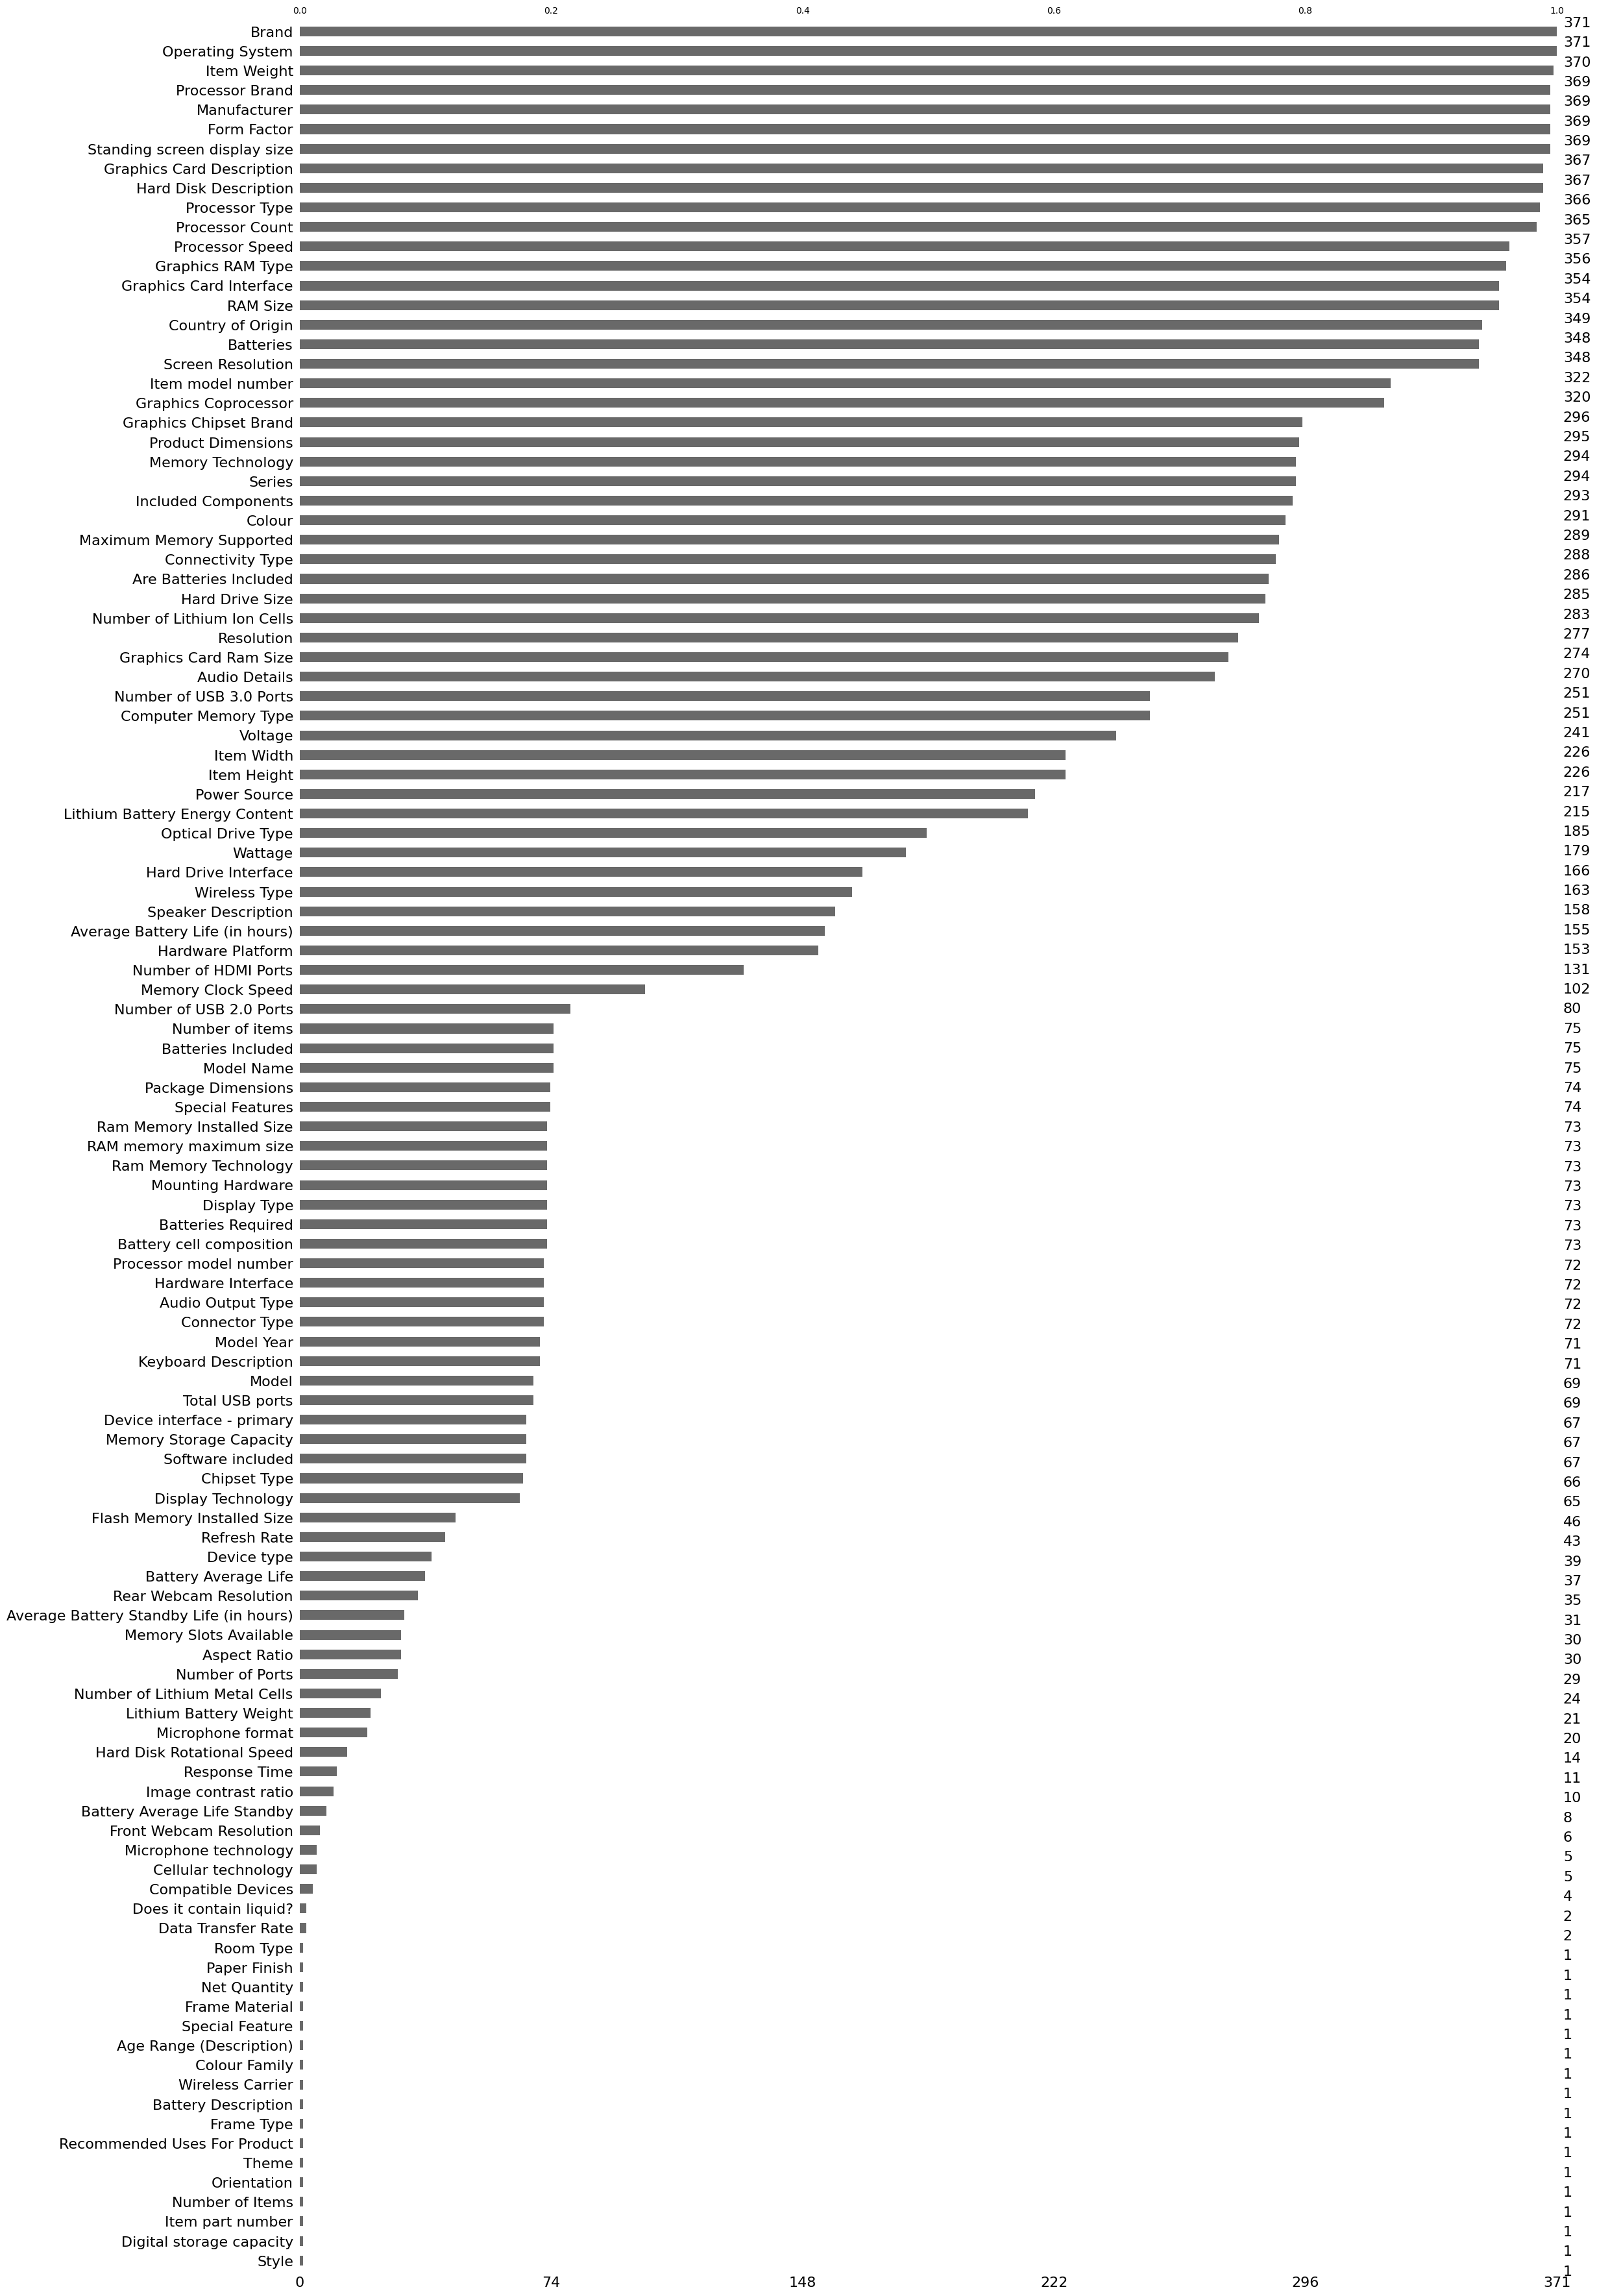

In [36]:
missingno.bar(df,sort="ascending")

<Axes: >

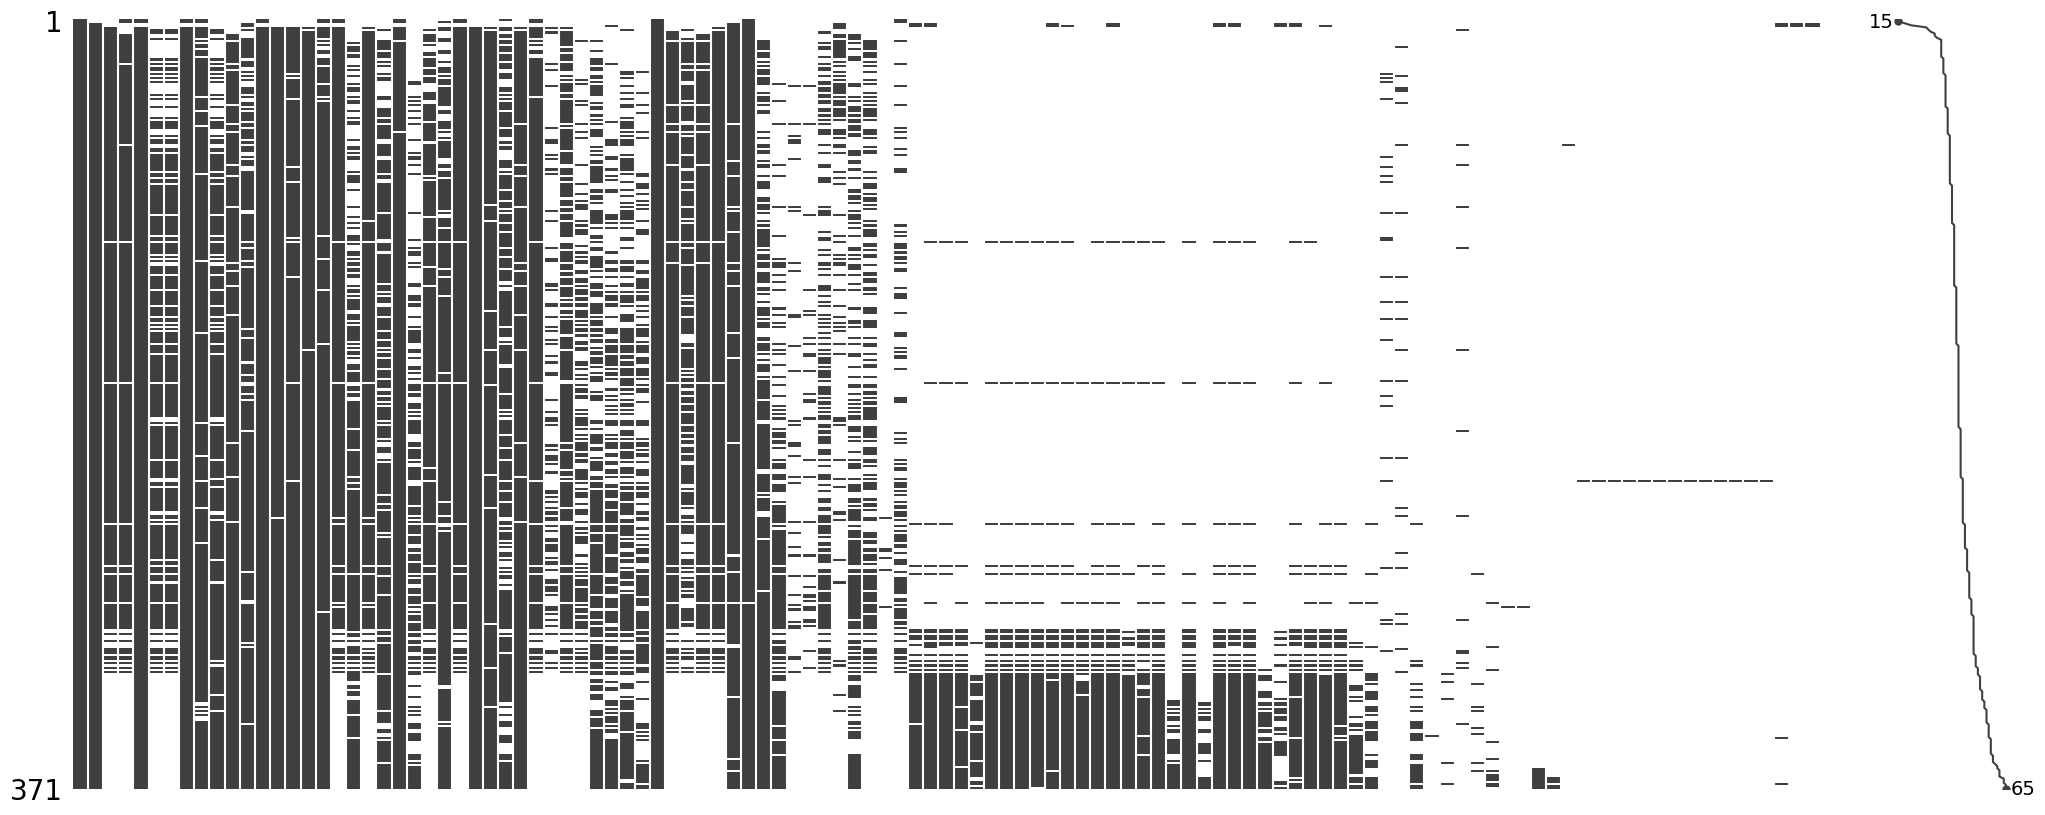

In [37]:
missingno.matrix(df,sort="ascending")

#### Removing columns with less than 50 values

In [38]:
df.dropna(axis=1, thresh=50, ignore_index=True, inplace=True)
df

,Brand,Manufacturer,Series,Colour,Form Factor,Item Height,Item Width,Standing screen display size,Screen Resolution,Product Dimensions,Batteries,Item model number,Processor Brand,Processor Type,Processor Speed,Processor Count,RAM Size,Memory Technology,Computer Memory Type,Maximum Memory Supported,Hard Drive Size,Hard Disk Description,Hard Drive Interface,Audio Details,Graphics Coprocessor,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Graphics Card Ram Size,Graphics Card Interface,Connectivity Type,Number of USB 2.0 Ports,Number of USB 3.0 Ports,Number of HDMI Ports,Voltage,Wattage,Power Source,Hardware Platform,Operating System,Are Batteries Included,Lithium Battery Energy Content,Number of Lithium Ion Cells,Included Components,Country of Origin,Item Weight,Resolution,Wireless Type,Average Battery Life (in hours),Package Dimensions,Optical Drive Type,Speaker Description,Memory Clock Speed,Model,Model Name,Model Year,Memory Storage Capacity,Ram Memory Installed Size,RAM memory maximum size,Ram Memory Technology,Processor model number,Hardware Interface,Special Features,Chipset Type,Mounting Hardware,Number of items,Software included,Display Technology,Display Type,Audio Output Type,Batteries Included,Batteries Required,Battery cell composition,Total USB ports,Keyboard Description,Connector Type,Device interface - primary
0,‎MSI,‎MSI,‎Sword 15 A12VF-401IN,‎White,‎Laptop,‎23 Millimeters,‎25 Centimeters,‎40 Centimetres,‎1920 x 1080 pixel,‎35.9 x 25 x 2.3 cm; 2.25 Kilograms,‎1 Lithium Polymer batteries required. (included),‎9S7-158522-401,‎Intel,‎Intel Core i7,‎4.7 GHz,‎1,‎16 GB,‎DDR5,‎DDR5 RAM,‎64 GB,‎1 TB,‎SSD,‎PCIE x 4,"‎Headphones, Speakers",‎NVIDIA GeForce RTX 4060,‎NVIDIA,‎Dedicated,‎GDDR6,‎8 GB,‎PCI Express,"‎Bluetooth, Wi-Fi",‎1,‎3,‎1,‎11.1 Volts,‎53.5 Watt Hours,‎Battery Powered,"‎PC, Linux",‎Windows 11 Home,‎Yes,‎52.5 Watt Hours,‎3,"‎Laptop, Power Adapter",‎China,‎2 kg 250 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,‎Lenovo,‎amd,‎IdeaPad Gaming 3 15ACH6,‎Shadow Black,‎Gaming,‎24 Millimeters,‎25.2 Centimeters,‎15.6 Inches,‎1921 x 1080 pixel,‎36 x 25.2 x 2.4 cm; 2.25 Kilograms,NaN,‎82K2022VIN-cr,‎NVIDIA,‎Ryzen 5,‎3.3 GHz,‎6,‎8 GB,‎DDR4,‎DDR4 SDRAM,‎16 GB,‎512 GB,‎SSD,‎USB 3.2,‎Speakers,‎NVIDIA GeForce RTX 3050,‎NVIDIA,‎Dedicated,‎GDDR6,‎4 GB,NaN,"‎Bluetooth, Wi-Fi",NaN,NaN,‎1,‎10.8 Volts,‎85 Watts,‎Battery Powered,NaN,‎Windows 11 Home,‎Yes,‎45 Watt Hours,‎3,"‎Laptop, User Manual, Power Adapter",‎China,‎2 kg 250 g,‎1920 X 1080 (FHD) Pixels,‎Bluetooth,‎5 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,‎Dell,‎Dell India Pvt Ltd,‎G15-5530,‎Dark Shadow Gray with Black thermal shelf,‎Laptop,NaN,NaN,‎15.6 Inches,‎1920 x 1080 pixel,NaN,‎1 Lithium Ion batteries required. (included),NaN,‎Intel,‎Core i7,‎4.9 GHz,‎1,‎16,‎DDR5,NaN,‎32 GB,NaN,‎SSD,NaN,‎Headphones,NaN,‎NVIDIA,‎Dedicated,‎GDDR6,‎6 GB,‎PCI Express,‎Wi-Fi,NaN,‎3,NaN,NaN,NaN,NaN,NaN,‎Windows 11 Home,‎Yes,NaN,‎3,"‎‎‎‎Laptop, Battery, AC Adapter, User Guide, M...",‎China,‎2 kg 650 g,NaN,NaN,NaN,‎57.79 x 34.9 x 7.9 cm; 2.65 Kilograms,‎CD-R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,‎Microsoft,‎Microsoft,‎Surface Pro 9,‎Graphite,‎Convertible,‎9 Millimeters,‎20.9 Centimeters,‎13 Inches,‎1600 x 1200 pixels,‎28.7 x 20.9 x 0.9 cm; 879 Grams,‎1 Lithium Ion batteries required. (included),‎QIL-00031,‎Intel,‎Core i7,‎4.7 GHz,‎1,‎16 GB,‎Lpddr 5,‎DDR5 RAM,‎16 GB,‎256 GB,‎SSD,‎eSATA,"‎Headphones, Speakers",‎Intel Iris Xe Graphics,‎Intel,‎Integrated,‎DDR5 SDRAM,NaN,‎Integrated,"‎Bluetooth, Wi-Fi, NFC",‎1,‎1,NaN,‎28 Volts,‎50 Watts,NaN,‎Windows,‎Windows 11 Home,‎Yes,NaN,‎6,"‎Power Adopter, Manual Book",‎China,‎879 g,‎2880 x 1920 Pixels,"‎Bluetooth, 802.11ax",‎15.5 Hours,NaN,‎BD-ROM,‎2W stereo speakers with Dolby® Atmos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

#### Removing rows with less than 40 populated features

In [39]:
df.dropna(axis=0, thresh=40, ignore_index=True, inplace=True)
df

,Brand,Manufacturer,Series,Colour,Form Factor,Item Height,Item Width,Standing screen display size,Screen Resolution,Product Dimensions,Batteries,Item model number,Processor Brand,Processor Type,Processor Speed,Processor Count,RAM Size,Memory Technology,Computer Memory Type,Maximum Memory Supported,Hard Drive Size,Hard Disk Description,Hard Drive Interface,Audio Details,Graphics Coprocessor,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Graphics Card Ram Size,Graphics Card Interface,Connectivity Type,Number of USB 2.0 Ports,Number of USB 3.0 Ports,Number of HDMI Ports,Voltage,Wattage,Power Source,Hardware Platform,Operating System,Are Batteries Included,Lithium Battery Energy Content,Number of Lithium Ion Cells,Included Components,Country of Origin,Item Weight,Resolution,Wireless Type,Average Battery Life (in hours),Package Dimensions,Optical Drive Type,Speaker Description,Memory Clock Speed,Model,Model Name,Model Year,Memory Storage Capacity,Ram Memory Installed Size,RAM memory maximum size,Ram Memory Technology,Processor model number,Hardware Interface,Special Features,Chipset Type,Mounting Hardware,Number of items,Software included,Display Technology,Display Type,Audio Output Type,Batteries Included,Batteries Required,Battery cell composition,Total USB ports,Keyboard Description,Connector Type,Device interface - primary
0,‎MSI,‎MSI,‎Sword 15 A12VF-401IN,‎White,‎Laptop,‎23 Millimeters,‎25 Centimeters,‎40 Centimetres,‎1920 x 1080 pixel,‎35.9 x 25 x 2.3 cm; 2.25 Kilograms,‎1 Lithium Polymer batteries required. (included),‎9S7-158522-401,‎Intel,‎Intel Core i7,‎4.7 GHz,‎1,‎16 GB,‎DDR5,‎DDR5 RAM,‎64 GB,‎1 TB,‎SSD,‎PCIE x 4,"‎Headphones, Speakers",‎NVIDIA GeForce RTX 4060,‎NVIDIA,‎Dedicated,‎GDDR6,‎8 GB,‎PCI Express,"‎Bluetooth, Wi-Fi",‎1,‎3,‎1,‎11.1 Volts,‎53.5 Watt Hours,‎Battery Powered,"‎PC, Linux",‎Windows 11 Home,‎Yes,‎52.5 Watt Hours,‎3,"‎Laptop, Power Adapter",‎China,‎2 kg 250 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,‎Lenovo,‎amd,‎IdeaPad Gaming 3 15ACH6,‎Shadow Black,‎Gaming,‎24 Millimeters,‎25.2 Centimeters,‎15.6 Inches,‎1921 x 1080 pixel,‎36 x 25.2 x 2.4 cm; 2.25 Kilograms,NaN,‎82K2022VIN-cr,‎NVIDIA,‎Ryzen 5,‎3.3 GHz,‎6,‎8 GB,‎DDR4,‎DDR4 SDRAM,‎16 GB,‎512 GB,‎SSD,‎USB 3.2,‎Speakers,‎NVIDIA GeForce RTX 3050,‎NVIDIA,‎Dedicated,‎GDDR6,‎4 GB,NaN,"‎Bluetooth, Wi-Fi",NaN,NaN,‎1,‎10.8 Volts,‎85 Watts,‎Battery Powered,NaN,‎Windows 11 Home,‎Yes,‎45 Watt Hours,‎3,"‎Laptop, User Manual, Power Adapter",‎China,‎2 kg 250 g,‎1920 X 1080 (FHD) Pixels,‎Bluetooth,‎5 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,‎Microsoft,‎Microsoft,‎Surface Pro 9,‎Graphite,‎Convertible,‎9 Millimeters,‎20.9 Centimeters,‎13 Inches,‎1600 x 1200 pixels,‎28.7 x 20.9 x 0.9 cm; 879 Grams,‎1 Lithium Ion batteries required. (included),‎QIL-00031,‎Intel,‎Core i7,‎4.7 GHz,‎1,‎16 GB,‎Lpddr 5,‎DDR5 RAM,‎16 GB,‎256 GB,‎SSD,‎eSATA,"‎Headphones, Speakers",‎Intel Iris Xe Graphics,‎Intel,‎Integrated,‎DDR5 SDRAM,NaN,‎Integrated,"‎Bluetooth, Wi-Fi, NFC",‎1,‎1,NaN,‎28 Volts,‎50 Watts,NaN,‎Windows,‎Windows 11 Home,‎Yes,NaN,‎6,"‎Power Adopter, Manual Book",‎China,‎879 g,‎2880 x 1920 Pixels,"‎Bluetooth, 802.11ax",‎15.5 Hours,NaN,‎BD-ROM,‎2W stereo speakers with Dolby® Atmos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,‎Lenovo,‎Lenovo,‎Legion Pro 5 16IRX8,‎Onyx Grey,‎Gaming Laptop,NaN,NaN,‎16 Inches,‎2560 x 1600 pixel,NaN,‎1 Lithium Ion batteries required. (included),‎82WK00MWIN,‎Intel,‎Intel Core i7,‎2.1 GHz,‎16,‎16 GB,‎DDR5,‎DDR5 RAM,‎32 GB,‎1 TB,‎SSD,‎PCIE x 4,"‎Headphones, Speakers",‎NVIDIA GeForce RTX 4060,‎NVIDIA,‎Dedicated,‎Shared,‎8 GB,‎PCI Express,"‎Bluetooth, Wi-Fi",NaN,‎6,NaN,NaN,NaN,NaN,NaN,‎Windows 11 Home,‎Yes,‎60 Watt Hours,‎4,‎Laptop,‎China,‎2 kg 550 g,‎2560 x 1600 Pixels,NaN,‎6 Hours,‎54 x 36.7 x 8.9 cm; 2.55 Kilograms,‎No Optic

<Axes: >

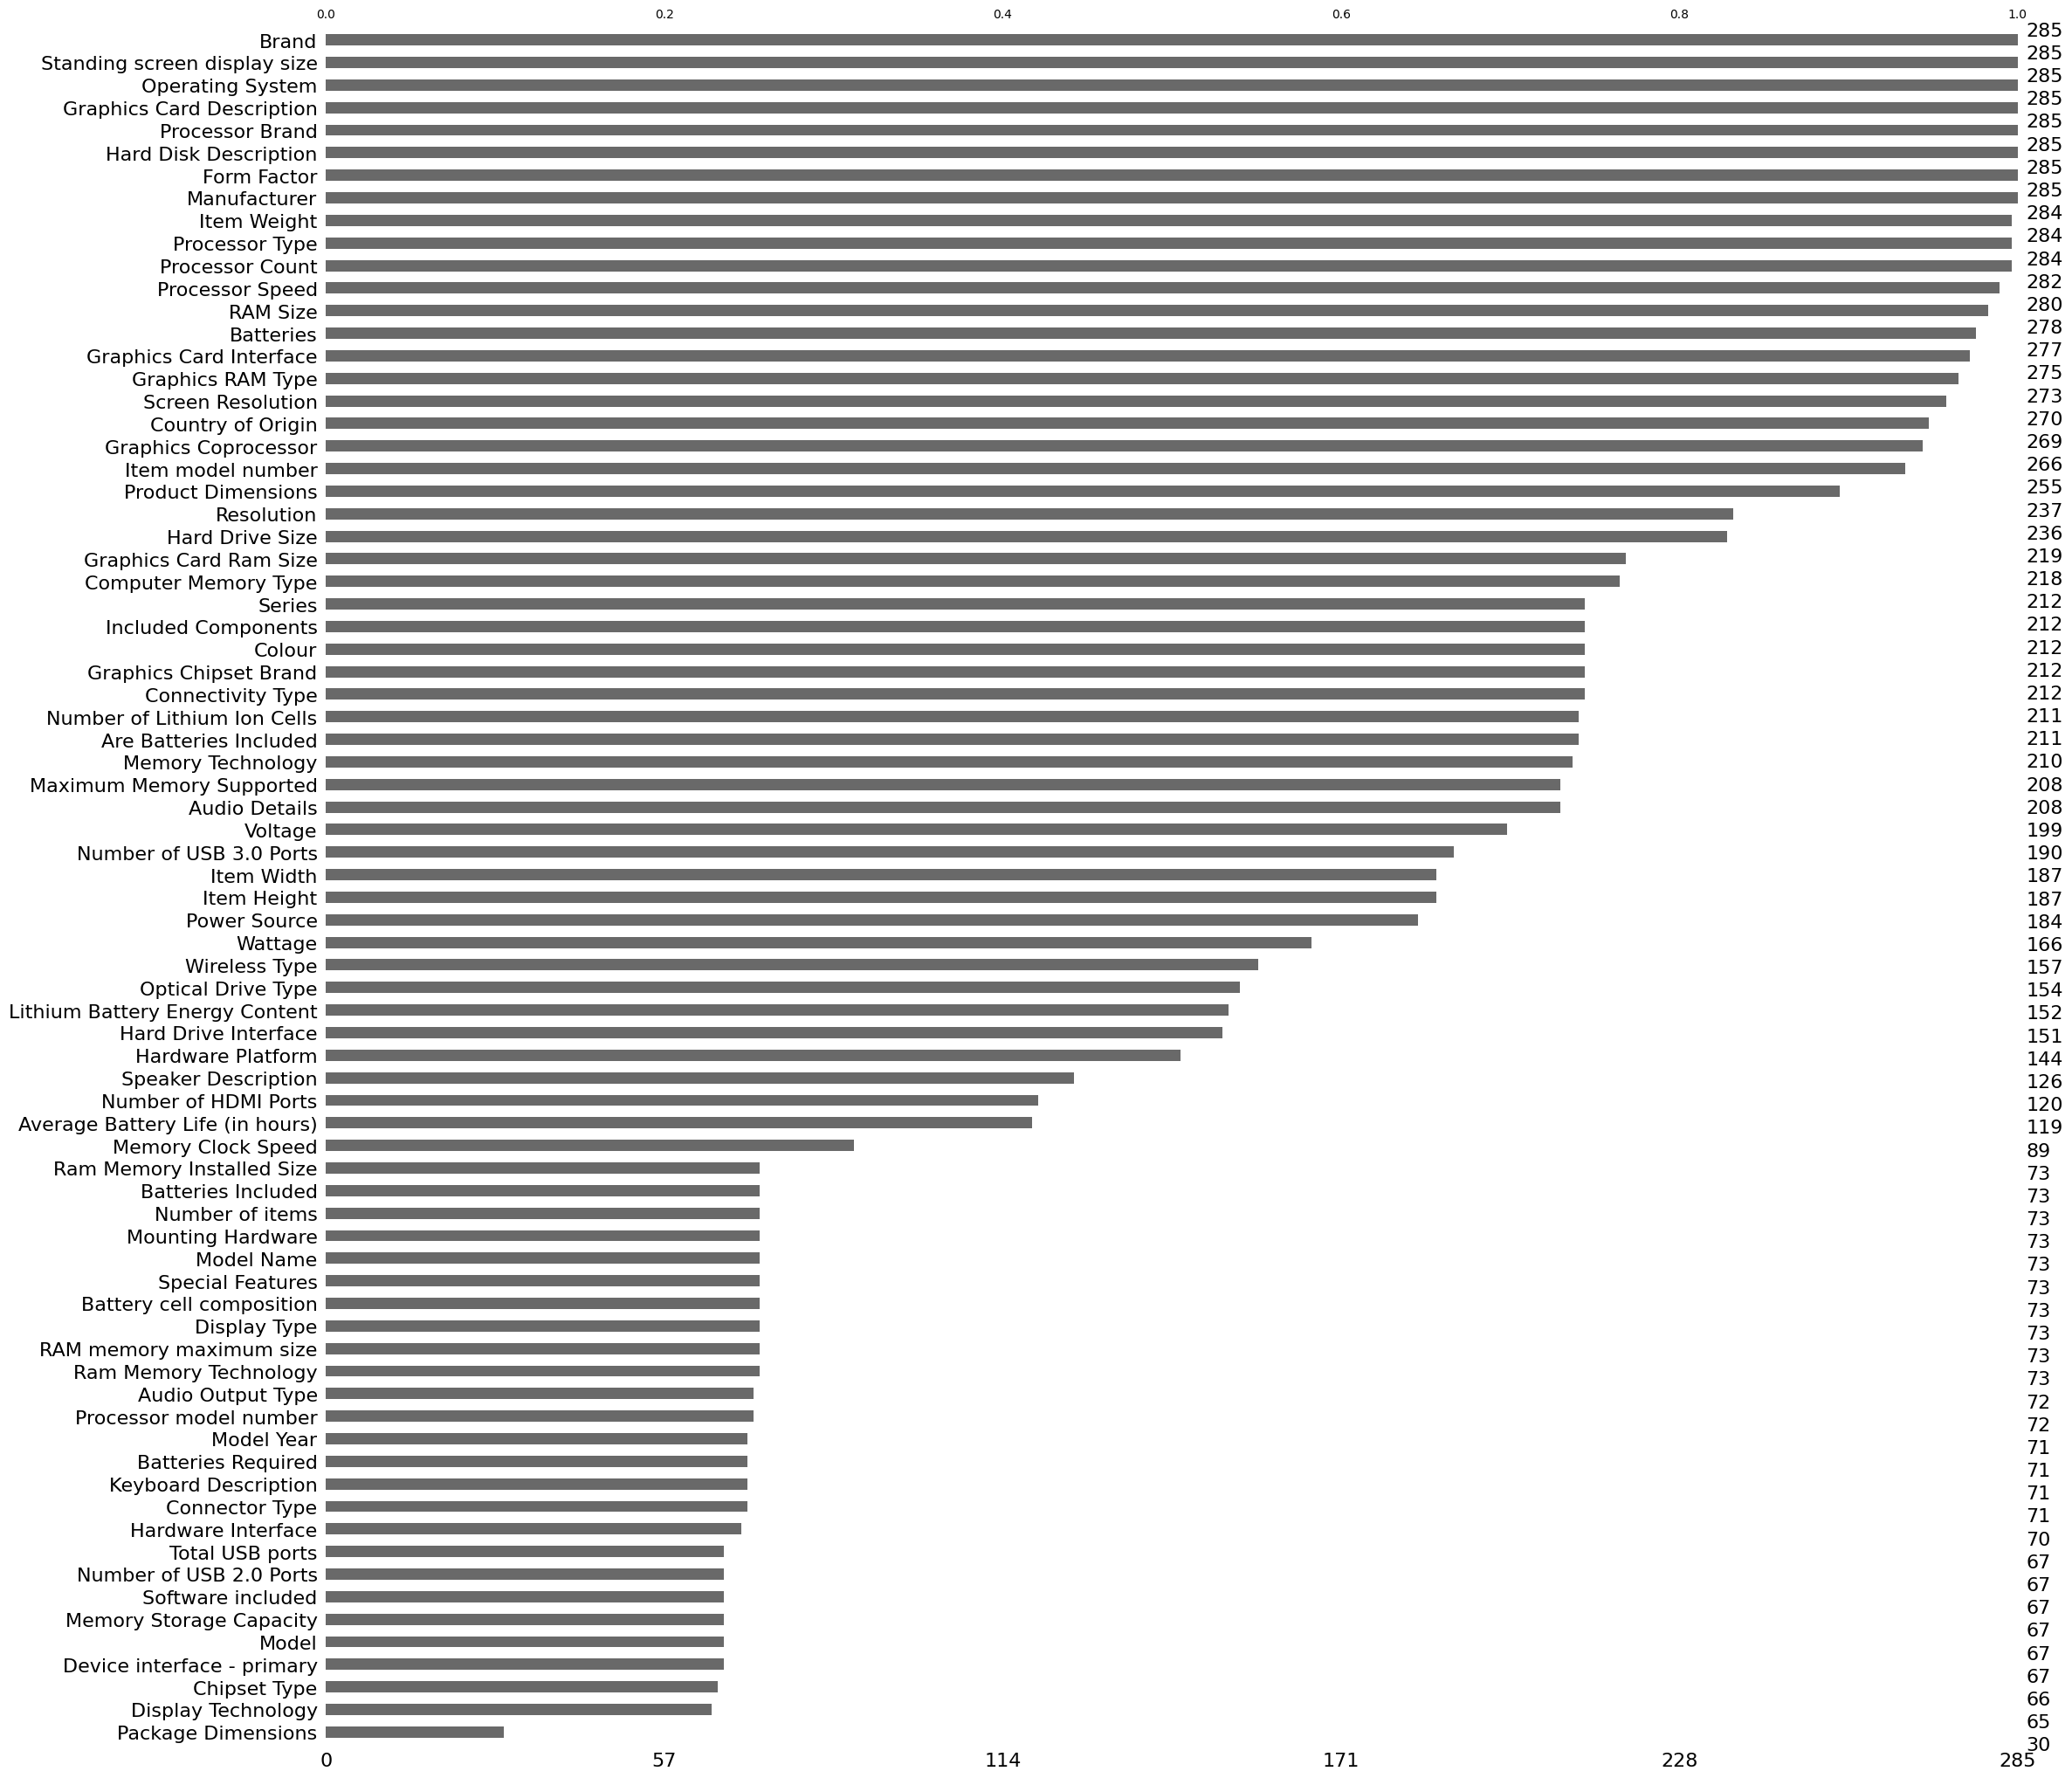

In [40]:
missingno.bar(df,sort="ascending")

<Axes: >

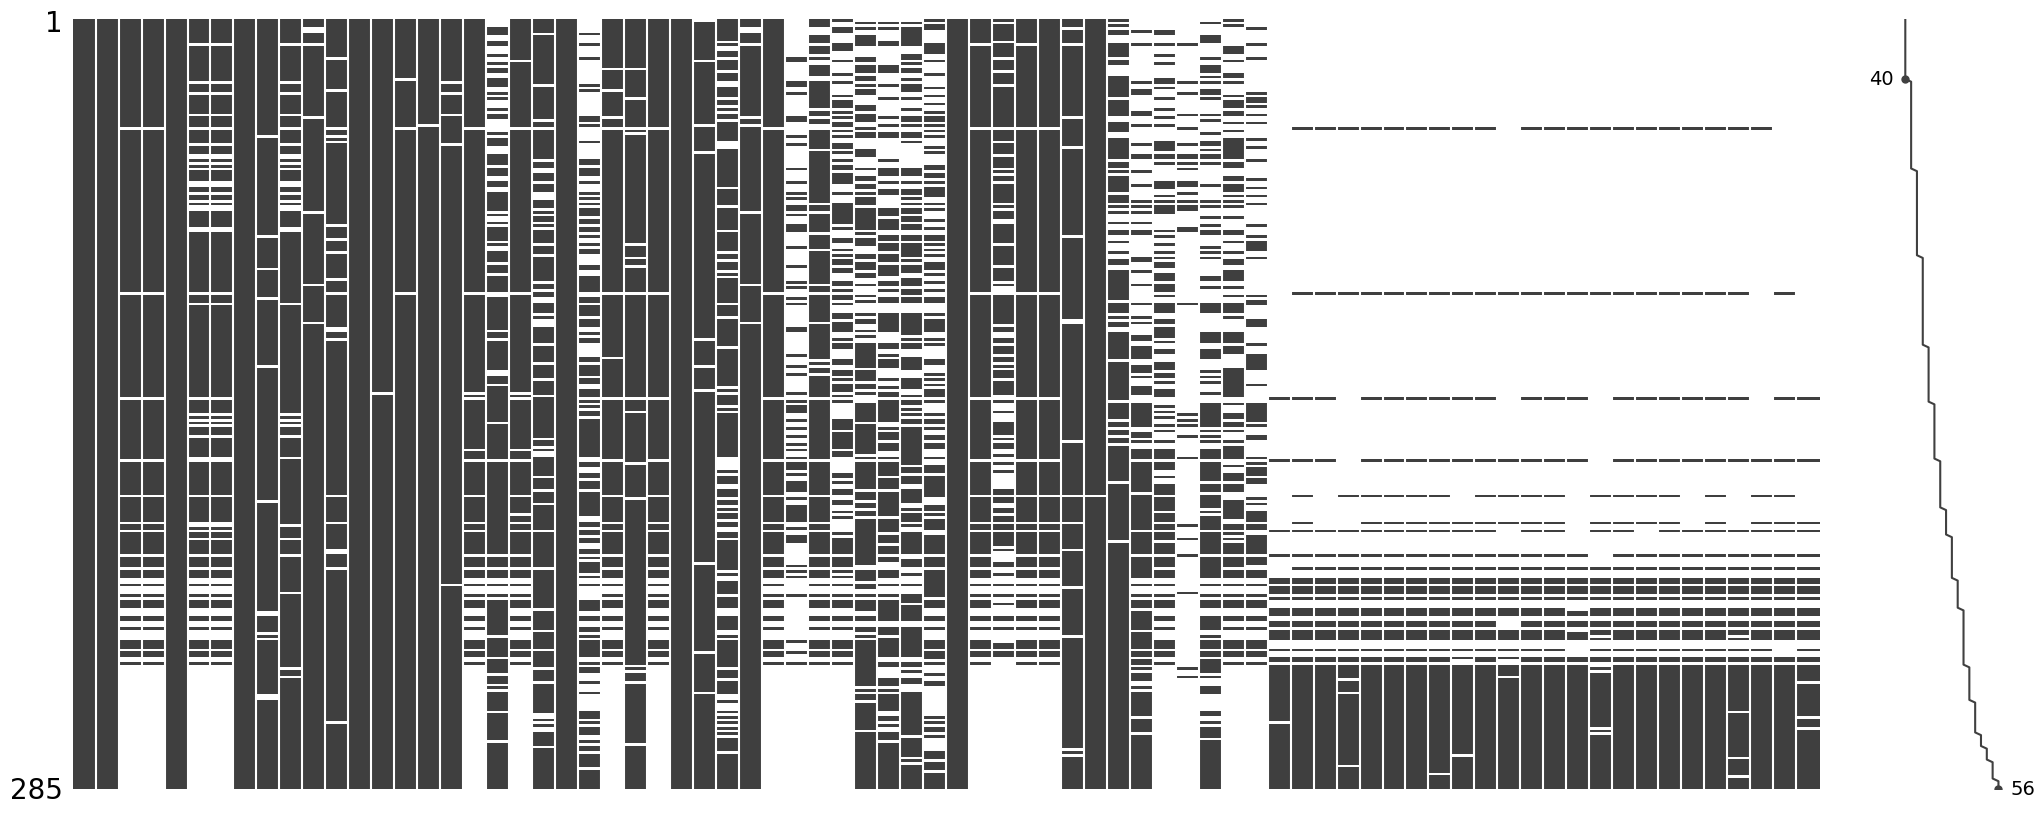

In [41]:
missingno.matrix(df,sort="ascending")

In [42]:
df

,Brand,Manufacturer,Series,Colour,Form Factor,Item Height,Item Width,Standing screen display size,Screen Resolution,Product Dimensions,Batteries,Item model number,Processor Brand,Processor Type,Processor Speed,Processor Count,RAM Size,Memory Technology,Computer Memory Type,Maximum Memory Supported,Hard Drive Size,Hard Disk Description,Hard Drive Interface,Audio Details,Graphics Coprocessor,Graphics Chipset Brand,Graphics Card Description,Graphics RAM Type,Graphics Card Ram Size,Graphics Card Interface,Connectivity Type,Number of USB 2.0 Ports,Number of USB 3.0 Ports,Number of HDMI Ports,Voltage,Wattage,Power Source,Hardware Platform,Operating System,Are Batteries Included,Lithium Battery Energy Content,Number of Lithium Ion Cells,Included Components,Country of Origin,Item Weight,Resolution,Wireless Type,Average Battery Life (in hours),Package Dimensions,Optical Drive Type,Speaker Description,Memory Clock Speed,Model,Model Name,Model Year,Memory Storage Capacity,Ram Memory Installed Size,RAM memory maximum size,Ram Memory Technology,Processor model number,Hardware Interface,Special Features,Chipset Type,Mounting Hardware,Number of items,Software included,Display Technology,Display Type,Audio Output Type,Batteries Included,Batteries Required,Battery cell composition,Total USB ports,Keyboard Description,Connector Type,Device interface - primary
0,‎MSI,‎MSI,‎Sword 15 A12VF-401IN,‎White,‎Laptop,‎23 Millimeters,‎25 Centimeters,‎40 Centimetres,‎1920 x 1080 pixel,‎35.9 x 25 x 2.3 cm; 2.25 Kilograms,‎1 Lithium Polymer batteries required. (included),‎9S7-158522-401,‎Intel,‎Intel Core i7,‎4.7 GHz,‎1,‎16 GB,‎DDR5,‎DDR5 RAM,‎64 GB,‎1 TB,‎SSD,‎PCIE x 4,"‎Headphones, Speakers",‎NVIDIA GeForce RTX 4060,‎NVIDIA,‎Dedicated,‎GDDR6,‎8 GB,‎PCI Express,"‎Bluetooth, Wi-Fi",‎1,‎3,‎1,‎11.1 Volts,‎53.5 Watt Hours,‎Battery Powered,"‎PC, Linux",‎Windows 11 Home,‎Yes,‎52.5 Watt Hours,‎3,"‎Laptop, Power Adapter",‎China,‎2 kg 250 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,‎Lenovo,‎amd,‎IdeaPad Gaming 3 15ACH6,‎Shadow Black,‎Gaming,‎24 Millimeters,‎25.2 Centimeters,‎15.6 Inches,‎1921 x 1080 pixel,‎36 x 25.2 x 2.4 cm; 2.25 Kilograms,NaN,‎82K2022VIN-cr,‎NVIDIA,‎Ryzen 5,‎3.3 GHz,‎6,‎8 GB,‎DDR4,‎DDR4 SDRAM,‎16 GB,‎512 GB,‎SSD,‎USB 3.2,‎Speakers,‎NVIDIA GeForce RTX 3050,‎NVIDIA,‎Dedicated,‎GDDR6,‎4 GB,NaN,"‎Bluetooth, Wi-Fi",NaN,NaN,‎1,‎10.8 Volts,‎85 Watts,‎Battery Powered,NaN,‎Windows 11 Home,‎Yes,‎45 Watt Hours,‎3,"‎Laptop, User Manual, Power Adapter",‎China,‎2 kg 250 g,‎1920 X 1080 (FHD) Pixels,‎Bluetooth,‎5 Hours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,‎Microsoft,‎Microsoft,‎Surface Pro 9,‎Graphite,‎Convertible,‎9 Millimeters,‎20.9 Centimeters,‎13 Inches,‎1600 x 1200 pixels,‎28.7 x 20.9 x 0.9 cm; 879 Grams,‎1 Lithium Ion batteries required. (included),‎QIL-00031,‎Intel,‎Core i7,‎4.7 GHz,‎1,‎16 GB,‎Lpddr 5,‎DDR5 RAM,‎16 GB,‎256 GB,‎SSD,‎eSATA,"‎Headphones, Speakers",‎Intel Iris Xe Graphics,‎Intel,‎Integrated,‎DDR5 SDRAM,NaN,‎Integrated,"‎Bluetooth, Wi-Fi, NFC",‎1,‎1,NaN,‎28 Volts,‎50 Watts,NaN,‎Windows,‎Windows 11 Home,‎Yes,NaN,‎6,"‎Power Adopter, Manual Book",‎China,‎879 g,‎2880 x 1920 Pixels,"‎Bluetooth, 802.11ax",‎15.5 Hours,NaN,‎BD-ROM,‎2W stereo speakers with Dolby® Atmos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,‎Lenovo,‎Lenovo,‎Legion Pro 5 16IRX8,‎Onyx Grey,‎Gaming Laptop,NaN,NaN,‎16 Inches,‎2560 x 1600 pixel,NaN,‎1 Lithium Ion batteries required. (included),‎82WK00MWIN,‎Intel,‎Intel Core i7,‎2.1 GHz,‎16,‎16 GB,‎DDR5,‎DDR5 RAM,‎32 GB,‎1 TB,‎SSD,‎PCIE x 4,"‎Headphones, Speakers",‎NVIDIA GeForce RTX 4060,‎NVIDIA,‎Dedicated,‎Shared,‎8 GB,‎PCI Express,"‎Bluetooth, Wi-Fi",NaN,‎6,NaN,NaN,NaN,NaN,NaN,‎Windows 11 Home,‎Yes,‎60 Watt Hours,‎4,‎Laptop,‎China,‎2 kg 550 g,‎2560 x 1600 Pixels,NaN,‎6 Hours,‎54 x 36.7 x 8.9 cm; 2.55 Kilograms,‎No Optic

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 76 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Brand                            285 non-null    object
 1   Manufacturer                     285 non-null    object
 2   Series                           212 non-null    object
 3   Colour                           212 non-null    object
 4   Form Factor                      285 non-null    object
 5   Item Height                      187 non-null    object
 6   Item Width                       187 non-null    object
 7   Standing screen display size     285 non-null    object
 8   Screen Resolution                273 non-null    object
 9   Product Dimensions               255 non-null    object
 10  Batteries                        278 non-null    object
 11  Item model number                266 non-null    object
 12  Processor Brand                  285

In [44]:

# percentage of non-null values

round(df.count()/len(df)*100,2).sort_values(ascending=False)

Brand                              100.00
Standing screen display size       100.00
Manufacturer                       100.00
Graphics Card Description          100.00
Hard Disk Description              100.00
Processor Brand                    100.00
Operating System                   100.00
Form Factor                        100.00
Item Weight                         99.65
Processor Count                     99.65
Processor Type                      99.65
Processor Speed                     98.95
RAM Size                            98.25
Batteries                           97.54
Graphics Card Interface             97.19
Graphics RAM Type                   96.49
Screen Resolution                   95.79
Country of Origin                   94.74
Graphics Coprocessor                94.39
Item model number                   93.33
Product Dimensions                  89.47
Resolution                          83.16
Hard Drive Size                     82.81
Graphics Card Ram Size            